# Explore DeepFace Framework

## 1. Import

In [55]:
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

## 2. Load and Display Image

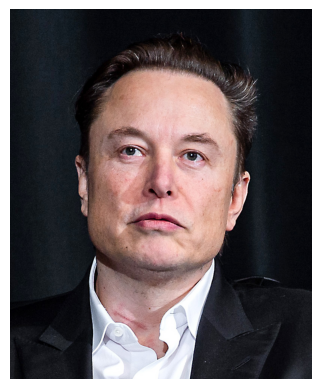

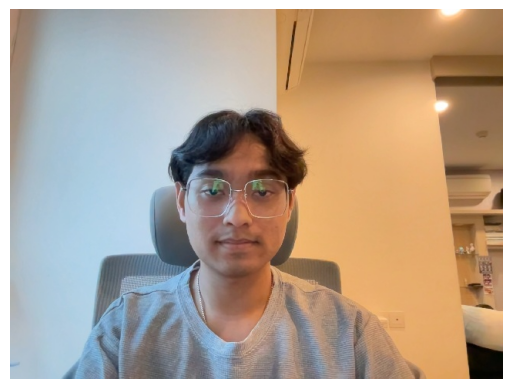

In [44]:
IMAGE_PATH_1 = './database/verification_images/test_reference.jpg'
IMAGE_PATH_2 = './database/verification_images/6338240121.jpg'

# Load the image file
img1 = Image.open(IMAGE_PATH_1)
img2 = Image.open(IMAGE_PATH_2)

# Display the image
plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()

## 3. Face Detection

In [31]:
FACE_DETECTORS = {
    'opencv': 'opencv',
    'ssd': 'ssd',
    'dlib': 'dlib',
    'mtcnn': 'mtcnn',
    'retinaface': 'retinaface',
    'mediapipe': 'mediapipe',
    'yolov8': 'yolov8',
    'yunet': 'yunet',
    'fastmtcnn': 'fastmtcnn',
}
face_detector = FACE_DETECTORS['retinaface']

Detector:  retinaface
Number of faces detected:  1
Object keys:  dict_keys(['face', 'facial_area', 'confidence'])
Facial Area:  {'x': 215, 'y': 201, 'w': 373, 'h': 494}
Confidence:  0.9994906187057495
Image size:  (224, 224, 3)


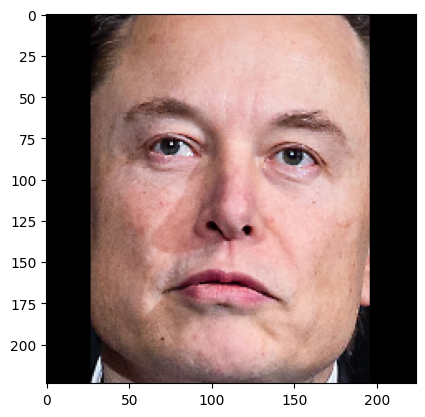

In [50]:
# face detection with no alignment
face_objects = DeepFace.extract_faces(
    img_path=IMAGE_PATH_1,
    target_size=(224, 224),
    detector_backend=face_detector,
    enforce_detection=True,
    align=False,
    grayscale=False
)
plt.imshow(face_objects[0]['face'])
print('Detector: ', face_detector)
print('Number of faces detected: ', len(face_objects))
print('Object keys: ', face_objects[0].keys())
print('Facial Area: ', face_objects[0]['facial_area'])
print('Confidence: ', face_objects[0]['confidence'])
print('Image size: ', face_objects[0]['face'].shape)

Detector:  retinaface
Number of faces detected:  1
Object keys:  dict_keys(['face', 'facial_area', 'confidence'])
Facial Area:  {'x': 215, 'y': 201, 'w': 373, 'h': 494}
Confidence:  0.9994906187057495
Image size:  (224, 224, 3)


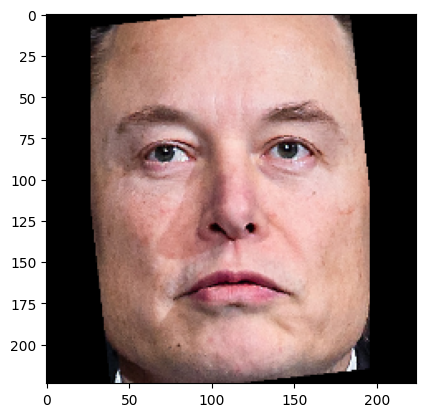

In [51]:
# face detection with alignment
face_objects = DeepFace.extract_faces(
    img_path=IMAGE_PATH_1,
    target_size=(224, 224),
    detector_backend=face_detector,
    enforce_detection=True,
    align=True,
    grayscale=False
)
plt.imshow(face_objects[0]['face'])
print('Detector: ', face_detector)
print('Number of faces detected: ', len(face_objects))
print('Object keys: ', face_objects[0].keys())
print('Facial Area: ', face_objects[0]['facial_area'])
print('Confidence: ', face_objects[0]['confidence'])
print('Image size: ', face_objects[0]['face'].shape)

## 4. Feature Embedding / Feature Representation

In [48]:
FACE_RECOGNIZERS = {
    'VGG-Face': 'VGG-Face',
    'Facenet': 'Facenet',
    'Facenet512': 'Facenet512',
    'OpenFace': 'OpenFace',
    'DeepFace': 'DeepFace',
    'DeepID': 'DeepID',
    'ArcFace': 'ArcFace',
    'Dlib': 'Dlib',
    'SFace': 'SFace',
    'Ensemble': 'Ensemble',
}
face_recognizer = FACE_RECOGNIZERS['VGG-Face']

In [52]:
# feture embedding
face_embeddings = DeepFace.represent(
    img_path=IMAGE_PATH_2,
    model_name=face_recognizer,
    detector_backend=face_detector,
    enforce_detection=True,
    align=True,
    normalization="base"
)

print('Recognizer: ', face_recognizer)
print('Number of faces detected: ', len(face_objects))
print('Object keys: ', face_embeddings[0].keys())
print('Facial Area: ', face_embeddings[0]['facial_area'])
print('Face Confidence: ', face_embeddings[0]['face_confidence'])
print('Embedding: ', face_embeddings[0]['embedding'])

Recognizer:  VGG-Face
Number of faces detected:  1
Object keys:  dict_keys(['embedding', 'facial_area', 'face_confidence'])
Facial Area:  {'x': 231, 'y': 167, 'w': 130, 'h': 175}
Face Confidence:  0.9995782971382141
Embedding:  [0.013079087249934673, 0.006351331248879433, 0.006280748639255762, 0.012697138823568821, 0.0035865616519004107, 0.019542239606380463, 0.008057593367993832, 0.017754413187503815, 0.01433915551751852, 0.01520365197211504, 0.013235184364020824, 0.00725940428674221, 0.016572680324316025, 0.01672140508890152, 0.008143367245793343, 0.0014545281883329153, 0.01972922682762146, 0.024498822167515755, 0.025005701929330826, 0.01184532418847084, 0.021918684244155884, 0.017229771241545677, 0.009265203028917313, 0.0031023668125271797, 0.014471443369984627, 0.008695056661963463, 0.00030727501143701375, -0.0035290648229420185, 0.007563862483948469, 0.009281889535486698, 0.010656698606908321, 0.010418682359158993, -0.011067098006606102, 0.012678507715463638, 0.018731189891695976,

## 5. Compare the similarity or distance between two embeddings using
- Cosine similarity
- Euclidean distance
- Euclidean distance L2

In [53]:
DISTANCE_METRICS = {
    'cosine': 'cosine',
    'euclidean': 'euclidean',
    'euclidean_l2': 'euclidean_l2',
}
distance_metric = DISTANCE_METRICS['cosine']

## 6. Combine 1-5 in verify function

In [54]:
# face verification
result = DeepFace.verify(
    img1_path=IMAGE_PATH_1,
    img2_path=IMAGE_PATH_2,
    model_name=face_recognizer,
    detector_backend=face_detector,
    distance_metric=distance_metric,
    enforce_detection=True,
    align=True,
    normalization="base"
)
result

{'verified': False,
 'distance': 0.4486339442041607,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 215, 'y': 201, 'w': 373, 'h': 494},
  'img2': {'x': 231, 'y': 167, 'w': 130, 'h': 175}},
 'time': 1.95}

## Threshold values for each model within DeepFace

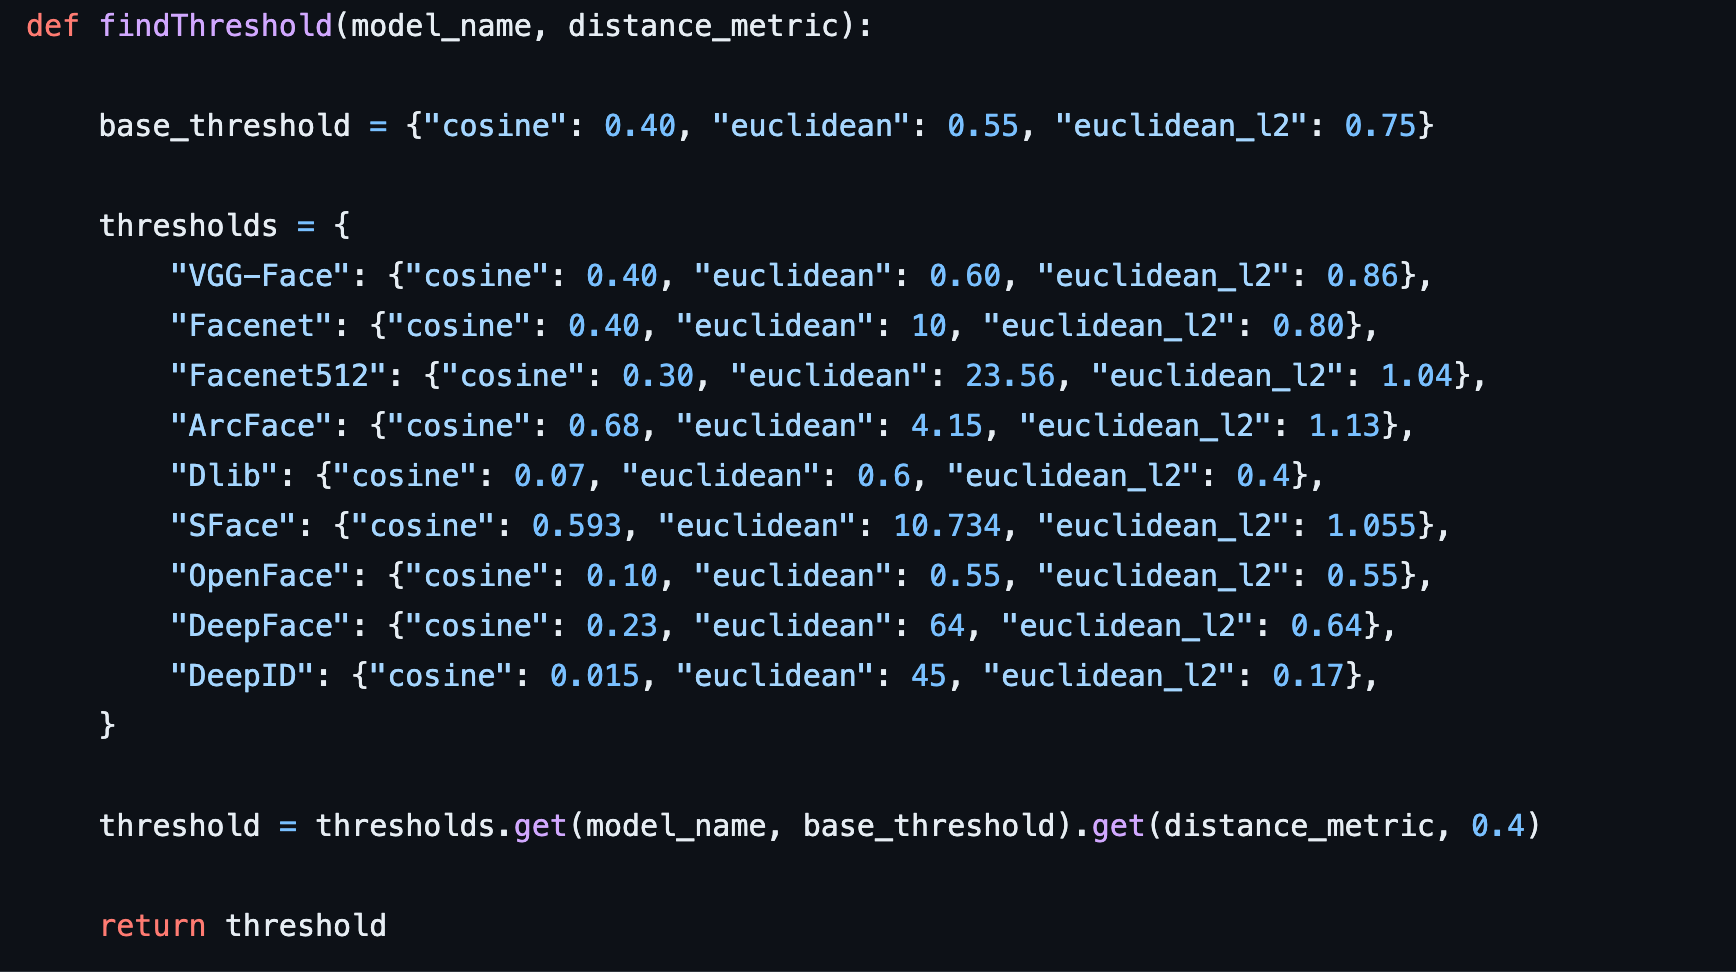